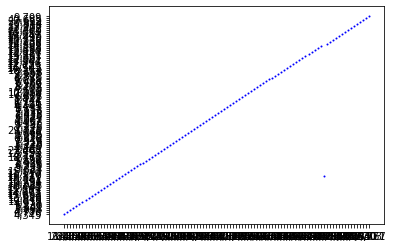

In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt

book_dir = "./Books"

# Helper Functions

def count_words(text):
    word_counts = {}
    text = text.lower()
    skips = [".", ",", ";", ":", "''", '""']
    
    for char in skips:
        text = text.replace(char, "")
    
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts


def read_book(title_path):
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text


def word_stats(word_counts):
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

# Loop through all books

stats = pd.DataFrame(columns= ("Language", "Author", "Title", "length", "unique"))
title_num = 1

for lang in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + lang):
        for title in os.listdir(book_dir + "/" + lang + "/" + author):
            inputfile = book_dir + "/" + lang + "/" + author + "/" + title
#             print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            stats.loc[title_num] = lang, author.capitalize(), title.replace(".txt", ""), '{:,}'.format(sum(counts)), '{:,}'.format(num_unique)
            title_num += 1
            
            
# stats.head(10)
plt.plot(stats.length, stats.unique, 'bo', markersize=1);

In [ ]:
# plt.figure(figsize = (10, 10))

# subset = stats[stats.Language == "English"]
# plt.plot(subset.length, subset.unique, "o", label="English", color = "crimson");

# subset = stats[stats.Language == "French"]
# plt.plot(subset.length, subset.unique, "o", label="French", color = "forestgreen");

# subset = stats[stats.Language == "German"]
# plt.plot(subset.length, subset.unique, "o", label="German", color = "orange");

# subset = stats[stats.Language == "Portuguese"]
# plt.plot(subset.length, subset.unique, "o", label="Portuguese", color = "blueviolet");

# plt.legend()
# plt.xlabel("Book length")
# plt.ylabel("Number of unique words")